In [ ]:
!pip install -U sec-cik-mapper

In [55]:
from sec_cik_mapper import StockMapper
from pathlib import Path

In [56]:
# stock mapper instance 생성
mapper = StockMapper()

In [57]:
# DataFrame 생성
mapper = mapper.raw_dataframe
# DataFrame 출력
mapper

,CIK,Ticker,Name,Exchange
0,0000001750,AIR,Aar Corp,NYSE
1,0000001800,ABT,Abbott Laboratories,NYSE
2,0000001961,WDDD,Worlds Inc,OTC
3,0000002098,ACU,Acme United Corp,NYSE
4,0000002178,AE,"Adams Resources & Energy, Inc.",NYSE
...,...,...,...,...
12157,0001913971,BPRN,"Princeton Bancorp, Inc.",Nasdaq
12158,0001914605,ECBK,"Ecb Bancorp, Inc. /Md/",
12159,0001915328,ISRL,Israel Acquisitions Corp,
12160,0001915657,DINO,Hf Sinclair Corp,NYSE


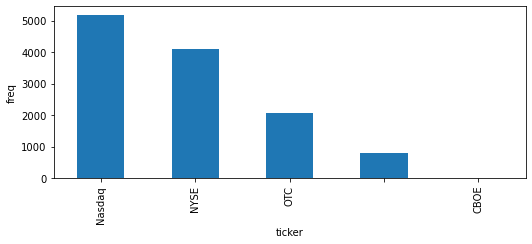

In [58]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

mapper['Exchange'].value_counts().plot(ax=ax, kind='bar', xlabel='ticker', ylabel='freq')

plt.show()

In [59]:
mapper['Exchange'].value_counts()

Nasdaq    5194
NYSE      4108
OTC       2053
           790
CBOE        17
Name: Exchange, dtype: int64

In [60]:
m_ticker = list(mapper['Ticker'])

In [61]:
# import pandas as pd
# 보내주신 자료의 ticker dataframe을 생성
import pandas as pd
ticker_df = pd.read_excel('./Members.xlsx', sheet_name='Sheet3', header=None)

In [62]:
# 문자열에서 Ticker만 분리한다.
# ex) AAME UQ 
ticker_df[0] = ticker_df[0].apply(lambda x: x.split(' ')[0])
t_ticker = list(ticker_df[0])

In [63]:
# 교집합
intersection = list(set(t_ticker) & set(m_ticker))

In [64]:
len(intersection)

4002

In [65]:
# 차집합 
list(set(t_ticker) - set(intersection))

['CRD/A',
 'BF/B',
 'LGF/B',
 'HEI/A',
 'GEF/B',
 'HAAC',
 'CWEN/A',
 'LEN/B',
 'JW/A',
 'FRBA',
 'MOG/A',
 'BF/A',
 'HIFS',
 'BRK/B',
 'LGF/A',
 'ESBK']

In [66]:
# 결과 저장

result_df = mapper[mapper['Ticker'].isin(t_ticker)]

In [67]:
result_df

,CIK,Ticker,Name,Exchange
0,0000001750,AIR,Aar Corp,NYSE
1,0000001800,ABT,Abbott Laboratories,NYSE
7,0000002488,AMD,Advanced Micro Devices Inc,Nasdaq
9,0000002969,APD,Air Products & Chemicals Inc /De/,NYSE
16,0000003197,CECE,Ceco Environmental Corp,Nasdaq
...,...,...,...,...
12079,0001892322,HTCR,"Heartcore Enterprises, Inc.",Nasdaq
12087,0001893219,ACAB,Atlantic Coastal Acquisition Corp. Ii,Nasdaq
12138,0001902733,NCNO,"Ncino, Inc.",Nasdaq
12157,0001913971,BPRN,"Princeton Bancorp, Inc.",Nasdaq


In [68]:
# ALpabet 검색
result_df.query('Ticker.str.contains("GOOG")', engine='python')

,CIK,Ticker,Name,Exchange
7456,0001652044,GOOG,Alphabet Inc.,Nasdaq
7457,0001652044,GOOGL,Alphabet Inc.,Nasdaq


In [69]:
# Berkshire Hathaway Inc 
mapper.query('Ticker.str.contains("BRK")', engine='python')

,CIK,Ticker,Name,Exchange
2853,0001049782,BRKL,Brookline Bancorp Inc,Nasdaq
3002,0001067983,BRK-A,Berkshire Hathaway Inc,NYSE
3003,0001067983,BRK-B,Berkshire Hathaway Inc,NYSE
3323,0001109354,BRKR,Bruker Corp,Nasdaq
11803,0001871638,BRKH,Burtech Acquisition Corp.,Nasdaq
11804,0001871638,BRKHU,Burtech Acquisition Corp.,Nasdaq
11805,0001871638,BRKHW,Burtech Acquisition Corp.,Nasdaq


In [70]:
# Berkshire Hathaway Inc
# BRK/A BRK/B 추가

brk_df = mapper[mapper['Name'] == 'Berkshire Hathaway Inc']
brk_df

,CIK,Ticker,Name,Exchange
3002,0001067983,BRK-A,Berkshire Hathaway Inc,NYSE
3003,0001067983,BRK-B,Berkshire Hathaway Inc,NYSE


In [73]:
for idx in range(len(brk_df)):
    row = brk_df.iloc[idx]
    result_df = pd.concat([pd.DataFrame([row], columns=result_df.columns), result_df], ignore_index=True)

In [74]:
result_df

,CIK,Ticker,Name,Exchange
0,0001067983,BRK-B,Berkshire Hathaway Inc,NYSE
1,0001067983,BRK-A,Berkshire Hathaway Inc,NYSE
2,0000001750,AIR,Aar Corp,NYSE
3,0000001800,ABT,Abbott Laboratories,NYSE
4,0000002488,AMD,Advanced Micro Devices Inc,Nasdaq
...,...,...,...,...
3999,0001892322,HTCR,"Heartcore Enterprises, Inc.",Nasdaq
4000,0001893219,ACAB,Atlantic Coastal Acquisition Corp. Ii,Nasdaq
4001,0001902733,NCNO,"Ncino, Inc.",Nasdaq
4002,0001913971,BPRN,"Princeton Bancorp, Inc.",Nasdaq


In [78]:
result_df['CIK'] = result_df['CIK'].astype(str)

In [79]:
# UNIQUE CIK
len(result_df['CIK'].unique())

3979

In [80]:
csv_path = "./cik_info.csv"
result_df.to_csv(csv_path, index=None)